In [1]:
# Import supporting libraries

import pandas 
import numpy
import sklearn.impute as impute
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as modelsel
import sklearn.tree as tree
import sklearn.metrics as metrics
import sklearn.svm as SVC
import pydotplus
import collections
import sklearn
from sklearn.utils import resample
from sklearn.feature_selection import SequentialFeatureSelector
import os
import warnings
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import class_weight
from sklearn.neural_network import MLPClassifier
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import  ConfusionMatrixDisplay
warnings.filterwarnings('ignore')

2023-04-25 15:47:23.639978: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 15:47:23.701038: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-25 15:47:23.703834: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-25 15:47:23.703841: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

In [24]:
df=pd.read_excel("../Goal_prediction_Data/cleaned_dataSPDO.xlsx")

In [25]:
X=df.drop(["is_goal"],axis=1)
y=df["is_goal"]

In [4]:
# Count the number of observations (0s and 1s) in the target varible
df_is_goal_1 = df[df["is_goal"]==1]
df_is_goal_0 = df[df["is_goal"]==0]

In [5]:
print(len(df_is_goal_0))
print(len(df_is_goal_1))
print(len(df))

18720
13683
32403


In [6]:
#==============: IMPLEMENT BALANCING TECHNIQUES TO THE DATASET :================
#  Technique 1: Oversampling (technique 2 is combined in the function of training the model)
over_sample_1 = resample(df_is_goal_1,n_samples = len(df_is_goal_0)) 
# The number of observations 0 is bigger than observation 1. 
# So choose len(df_is_goal_0) is 50% of the number of the total observations in the target variable. 
df_oversample = pandas.concat([df_is_goal_0, over_sample_1]) # New data set after oversampling

df_oversample = df_oversample.sample(frac = 1)                          # Sampling without replacement (basically reshuffling data)

# Define predictor features and target features for oversampling dataset
X_oversample =df_oversample.drop(["is_goal"],axis=1)
y_oversample =df_oversample["is_goal"]

In [7]:
# Define Sequential feature selection method
def feature_sel(model_name, n_selected_features, X, y):  
    #Feature selection
    sfs = SequentialFeatureSelector(model_name, n_features_to_select = n_selected_features)   # Sequential model of sklearn is used
    features= X.columns.values
    sfs.fit(X,y)
    support=sfs.get_support()  
    selected_features=features*support
    selected_features=list(selected_features)
    selected_features=[a for a in selected_features if a!=""]
    print("Selected Features: \n")
    print(selected_features)
    return(selected_features)

In [19]:
def f_and_d(model,X_train,y_train,y_test):
    
    model.fit(X_train, y_train)
    y_model = model.predict(X_test)
    print("Accuracy score:  {}".format(metrics.accuracy_score(y_test, y_model)))
    print('Precision:  {}'.format(metrics.precision_score(y_test, y_model))) 
    print('Recall:  {}'.format(metrics.recall_score(y_test, y_model)))
    print('F1 score: {}'.format(metrics.f1_score(y_test, y_model))) 
    print("Confusion matrix is: \n", metrics.confusion_matrix(y_test, y_model, normalize = "true"))
    
    return model

In [20]:
def fit_model(model, X_train, X_test, y_train, y_test,parameters=None,flag=False):
    
    if(flag==1):
        print("\n This model is with Oversampling \n")
        
        return f_and_d(model,X_train,y_train,y_test)
        
    elif(flag==2):
        print("\n This model is with class weight balancing technique")
        
        return f_and_d(model,X_train,y_train,y_test)
    else:
        print("\n This model is without balancing technique \n")
        classifier = GridSearchCV(model, parameters)
        # Fitting the model 
        classifier.fit(X_train, y_train)
        # print best parameter 
        print("Best Parameters from Grid Search: \n")
        print(classifier.best_params_)

        return f_and_d(classifier,X_train,y_train,y_test)

### Random Forest Models

In [11]:
# This is Random Forest Classifier model without any balancing technique

classifier = sklearn.ensemble.RandomForestClassifier(n_estimators = 2, criterion = 'gini', max_depth = 5, min_samples_leaf = 1)
selected_features=feature_sel(classifier,3,X,y)
X_selected=X[selected_features]
one_hot_X=pd.get_dummies(X_selected,columns=selected_features)
X_rf=one_hot_X.to_numpy()

# Partition into training/ test/ validation
RANSEED = 10000
X_train, X_test, y_train, y_test = modelsel.train_test_split(X_rf, y, test_size = 0.3, random_state = RANSEED)

# Defining possible values of parameters 
parameters = { 'n_estimators': [100, 300, 500],
            'max_depth': [3, 4, 5],
            'criterion': ['gini', 'entropy']} 
RFC = sklearn.ensemble.RandomForestClassifier()


fit_model(RFC, X_train,X_test,y_train,y_test,parameters=parameters)

Selected Features: 

['shot_outcome', 'situation', 'fast_break']

 This model is without balancing technique 

Best Parameters from Grid Search: 

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}
Accuracy score:  0.7488941466927271
Precision:  0.9594298245614035
Recall:  0.42506679621083315
F1 score: 0.5891264096953375
Confusion matrix is: 
 [[0.98679515 0.01320485]
 [0.5749332  0.4250668 ]]


In [21]:
# This is Random Forest Classifier model with oversampling


X_selected=X_oversample[selected_features]
one_hot_X=pd.get_dummies(X_selected,columns=selected_features)
X_rf=one_hot_X.to_numpy()
# Partition into training/ test/ validation
RANSEED = 10000
X_train, X_test, y_train, y_test = modelsel.train_test_split(X_rf, y_oversample, test_size = 0.3, random_state = RANSEED)

# Training model
classifier = sklearn.ensemble.RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = 3) # parameters are set as optimized base model


fit_model(classifier, X_train,X_test,y_train,y_test, flag=1)


 This model is with Oversampling 

Accuracy score:  0.7057514245014245
Precision:  0.9664375252729478
Recall:  0.4258731290092659
F1 score: 0.5912183055040199
Confusion matrix is: 
 [[0.98523132 0.01476868]
 [0.57412687 0.42587313]]


RandomForestClassifier(max_depth=3)

In [13]:
# This is Random Forest Classifier model with class weights technique
# Feature selection and onehot encoding for Random Forest Classifier

X_selected=X[selected_features]
one_hot_X=pd.get_dummies(X_selected,columns=selected_features)
X_rf=one_hot_X.to_numpy()
# Partition into training/ test/ validation
RANSEED = 10000
X_train, X_test, y_train, y_test = modelsel.train_test_split(X_rf, y, test_size = 0.3, random_state = RANSEED)

# Training model
classifier = sklearn.ensemble.RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = 3,class_weight=('balanced'))

fit_model(classifier, X_train,X_test,y_train,y_test, flag=2)


 This model is with class weight balancing technique
Accuracy score:  0.7488941466927271
Precision:  0.9594298245614035
Recall:  0.42506679621083315
F1 score: 0.5891264096953375
Confusion matrix is: 
 [[0.98679515 0.01320485]
 [0.5749332  0.4250668 ]]


## Decision Tree Models

In [28]:
# This is Decision Tree Classifier model without balancing techniques
# Partition into training/ test/ validation
RANSEED = 10000
X_train, X_test, y_train, y_test = modelsel.train_test_split(X, y, test_size = 0.3, random_state = RANSEED)

# Defining possible values of parameters 
parameters = { 'max_depth': [3, 4, 5],
            'criterion': ['gini', 'entropy']} 
DTC = tree.DecisionTreeClassifier()

classifierDTC=fit_model(DTC, X_train,X_test,y_train,y_test,parameters=parameters)




 This model is without balancing technique 

Best Parameters from Grid Search: 

{'criterion': 'entropy', 'max_depth': 5}
Accuracy score:  0.7505400678942495
Precision:  0.9597826086956521
Recall:  0.42895312120476076
F1 score: 0.5929158972637234
Confusion matrix is: 
 [[0.98679515 0.01320485]
 [0.57104688 0.42895312]]


In [29]:
# This is Decision Tree Classifier model with oversampling technique
# Partition into training/ test/ validation
RANSEED = 10000
X_train, X_test, y_train, y_test = modelsel.train_test_split(X_oversample, y_oversample, test_size = 0.3, random_state = RANSEED)
classifier = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5) # parameters are set as optimized base model

#Feature Selection: For decision tree classifier, the algorithm naturally choose variables
# Fitting the model

fit_model(classifier, X_train,X_test,y_train,y_test, flag=1)


 This model is with Oversampling 

Accuracy score:  0.7057514245014245
Precision:  0.9664375252729478
Recall:  0.4258731290092659
F1 score: 0.5912183055040199
Confusion matrix is: 
 [[0.98523132 0.01476868]
 [0.57412687 0.42587313]]


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
# # Plot decision tree
# featurenames = df.drop(['is_goal'], axis=1).columns.values.tolist()
# classnames = ["0", "1"]

# dot_data = tree.export_graphviz(classifier, out_file=None,feature_names=featurenames,
#                           impurity=True, class_names=classnames, filled=True, rounded=True, special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data)
# colors = ('lightblue', 'green')
# edges = collections.defaultdict(list)
# for edge in graph.get_edge_list():
# edges[edge.get_source()].append(int(edge.get_destination()))
# for edge in edges:
# edges[edge].sort()
# for i in range(2):
#   dest = graph.get_node(str(edges[edge][i]))[0]
#   dest.set_fillcolor(colors[i])
# filename = "conttree_project.png"
# graph.write_png(filename)
# from IPython.display import Image
# from IPython.core.display import HTML 
# PATH = "conttree_project.png"
# Image(filename = PATH , width=500, height=200)

In [30]:
# This is Decision Tree Classifier model with class weights technique
# Partition into training/ test/ validation
RANSEED = 10000
X_train, X_test, y_train, y_test = modelsel.train_test_split(X, y, test_size = 0.3, random_state = RANSEED)
classifier = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 1, class_weight=('balanced')) # parameters are set as optimized base model
#Feature Selection: For decision tree classifier, the algorithm naturally choose variables

fit_model(classifier, X_train,X_test,y_train,y_test, flag=2)


 This model is with class weight balancing technique
Accuracy score:  0.7505400678942495
Precision:  0.9597826086956521
Recall:  0.42895312120476076
F1 score: 0.5929158972637234
Confusion matrix is: 
 [[0.98679515 0.01320485]
 [0.57104688 0.42895312]]


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5)

## MLP Models

In [ ]:
# This is the MLP without balacing techniques
epochs = 20
# Feature selection and onehot encoding for MLP
classifier = MLPClassifier(hidden_layer_sizes = (2,2), solver = 'adam', random_state = 24060, activation = 'tanh', \
                alpha = 0.001, max_iter= 1000)
selected_features=feature_sel(classifier,3,X,y)
X_selected=X[selected_features]
one_hot_X=pd.get_dummies(X_selected,columns=selected_features)
X_mlp=one_hot_X.to_numpy()
# Partition into training/ test/ validation
RANSEED = 10000
X_train, X_test, y_train, y_test = modelsel.train_test_split(X_mlp, y, test_size = 0.3, random_state = RANSEED)
# Partition the dataset
def tfANNModel(): # using the keras API of TensorFlow
inputwidth = X_train.shape[1]
tf.random.set_seed(24060)
model = tf.keras.models.Sequential([
tf.keras.layers.InputLayer(input_shape=(inputwidth,)),
tf.keras.layers.Dense(6, activation= 'tanh'),
tf.keras.layers.Dense(6, activation= 'tanh'),
tf.keras.layers.Dense(1, activation='relu'),
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
return model

model = tfANNModel()
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, verbose=0) #This should be fit on the whole X and Y I think
y_model = model.predict(X_test)
y_model_bin = 1*(y_model > 0.5)

print("Accuracy score is {}".format(metrics.accuracy_score(y_test, y_model_bin)))
print('Precision is {}'.format(metrics.precision_score(y_test, y_model_bin))) 
print('Recall is {}'.format(metrics.recall_score(y_test, y_model_bin)))
print('F1 score is {}'.format(metrics.f1_score(y_test, y_model_bin))) 
print("Confusion matrix is:\n", metrics.confusion_matrix(y_test, y_model_bin))
print("Cross-validation scores is:", sklearn.model_selection.cross_val_score(classifier, X, y=y, cv=5))

In [31]:
# This is the MLP with oversampling technique
epochs = 20
# Feature selection and onehot encoding for MLP
classifier = MLPClassifier(hidden_layer_sizes = (2,2), solver = 'adam', random_state = 24060, activation = 'tanh', \
                alpha = 0.001, max_iter= 1000)
selected_features=feature_sel(classifier,3,X_oversample,y_oversample)
X_selected=X_oversample[selected_features]
one_hot_X=pd.get_dummies(X_selected,columns=selected_features)
X_mlp=one_hot_X.to_numpy()
# Partition into training/ test/ validation
RANSEED = 10000
X_train, X_test, y_train, y_test = modelsel.train_test_split(X_mlp, y_oversample, test_size = 0.3, random_state = RANSEED)
# Partition the dataset

def tfANNModel(): # using the keras API of TensorFlow
    inputwidth = X_train.shape[1]
    tf.random.set_seed(24060)
    model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(inputwidth,)),
    tf.keras.layers.Dense(6, activation= 'tanh'),
    tf.keras.layers.Dense(6, activation= 'tanh'),
    tf.keras.layers.Dense(1, activation='relu'),
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
    return model

model = tfANNModel()
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, verbose=0) 
y_model = model.predict(X_test)
y_model_bin = 1*(y_model > 0.5)

print("Accuracy score is {}".format(metrics.accuracy_score(y_test, y_model_bin)))
print('Precision is {}'.format(metrics.precision_score(y_test, y_model_bin))) 
print('Recall is {}'.format(metrics.recall_score(y_test, y_model_bin)))
print('F1 score is {}'.format(metrics.f1_score(y_test, y_model_bin))) 
print("Confusion matrix is:\n", metrics.confusion_matrix(y_test, y_model_bin))
print("Cross-validation scores is:", sklearn.model_selection.cross_val_score(classifier, X, y=y, cv=5))

Selected Features: 

['shot_place', 'location', 'situation']


2023-04-25 16:33:11.066640: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 16:33:11.067672: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-25 16:33:11.067732: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-04-25 16:33:11.067780: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-04-25 16:33:11.067826: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

351/351 [==============================] - 0s 1ms/step
Accuracy score is 0.7322827635327636
Precision is 0.7756613756613756
Recall is 0.6530648610121169
F1 score is 0.7091032214375543
Confusion matrix is:
 [[4560 1060]
 [1947 3665]]
Cross-validation scores is: [0.56179602 0.57768863 0.57768863 0.57777778 0.57777778]


In [ ]:
# This is the MLP with class weight technique
epochs = 20
# Feature selection and onehot encoding for MLP
classifier = MLPClassifier(hidden_layer_sizes = (2,2), solver = 'adam', random_state = 24060, activation = 'tanh', \
                alpha = 0.001, max_iter= 1000)
selected_features=feature_sel(classifier,3,X,y)
X_selected=X[selected_features]
one_hot_X=pd.get_dummies(X_selected,columns=selected_features)
X_mlp=one_hot_X.to_numpy()
# Partition into training/ test/ validation
RANSEED = 10000
X_train, X_test, y_train, y_test = modelsel.train_test_split(X_mlp, y, test_size = 0.3, random_state = RANSEED)
# Partition the dataset

def tfANNModel():
    inputwidth = X_train.shape[1]
    tf.random.set_seed(24060)
    model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(inputwidth,)),
    tf.keras.layers.Dense(6, activation= 'tanh'),
    tf.keras.layers.Dense(6, activation= 'tanh'),
    tf.keras.layers.Dense(1, activation='relu'),
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
    return model

model = tfANNModel()
total = len(df_is_goal_1)+len(df_is_goal_0)
weight_for_0 = (1 / len(df_is_goal_0)) * (total / 2.0)
weight_for_1 = (1 / len(df_is_goal_1)) * (total / 2.0)

class_weights = {0: weight_for_0, 1: weight_for_1}

start1 = time.time()
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, verbose=0, class_weight = class_weights)
stop1 = time.time()

start2 = time.time()
y_model = model.predict(X_test)
stop2 = time.time()

y_model_bin = 1*(y_model > 0.5)
training_time = stop1 - start1
prediction_time = stop2 - start2

print("Accuracy score is {}".format(metrics.accuracy_score(y_test, y_model_bin)))

print('Precision is {}'.format(metrics.precision_score(y_test, y_model_bin))) 
print('Recall is {}'.format(metrics.recall_score(y_test, y_model_bin)))
print('F1 score is {}'.format(metrics.f1_score(y_test, y_model_bin))) 
cm=sklearn.metrics.confusion_matrix(y_test, y_model_bin,normalize='true')
print(cm)
ConfusionMatrixDisplay(cm).plot()
print("Cross-validation scores is:", sklearn.model_selection.cross_val_score(classifier, X, y=y, cv=5))
print("Training time is: ", training_time)
print("Prediction time is: ", prediction_time)

## SVM Models

In [36]:
# This is SVM model without balancing technique
# Feature selection and onehot encoding for SVM
# Feature selection takes very long but after the features were found, we manually appended the top 3 features
X_selected =X.drop(["time", "shot_outcome", "location", "bodypart","assist_method","Unnamed: 0"],axis=1) #top 3 features selected
selected_features=list(X_selected.columns)
one_hot_X=pd.get_dummies(X_selected,columns=selected_features)
X_svm=one_hot_X.to_numpy()
# Partition into training/ test/ validation
RANSEED = 10000
X_train, X_test, y_train, y_test = modelsel.train_test_split(X_svm, y, test_size = 0.3, random_state = RANSEED)

classifier = SVC(kernel = "rbf", C=1, gamma = 1)

f_and_d(classifier,X_train,y_train,y_test)

Accuracy score:  0.7488941466927271
Precision:  0.9594298245614035
Recall:  0.42506679621083315
F1 score: 0.5891264096953375
Confusion matrix is: 
 [[0.98679515 0.01320485]
 [0.5749332  0.4250668 ]]


SVC(C=1, gamma=1)

In [37]:
# This is SVM model with oversampling technique
# Feature selection and onehot encoding for SVM
# Feature selection takes very long but after the features were found, we manually appended the top 3 features

classifier = SVC(kernel = "rbf", C=1, gamma = 1)
X_selected =X_oversample.drop(["time", "shot_outcome", "location", "bodypart","assist_method"],axis=1) #top 3 features selected
one_hot_X=pd.get_dummies(X_selected)
X_rf=one_hot_X.to_numpy()
# Partition into training/ test/ validation
RANSEED = 10000
X_train, X_test, y_train, y_test = modelsel.train_test_split(X_rf, y_oversample, test_size = 0.3, random_state = RANSEED)

classifier = SVC(kernel = "rbf", C=1, gamma = 1)

# Training model
fit_model(classifier, X_train,X_test,y_train,y_test, flag=1)


 This model is with Oversampling 

Accuracy score:  0.8056445868945868
Precision:  0.9928140270192584
Recall:  0.6154668567355667
F1 score: 0.7598724012759872
Confusion matrix is: 
 [[0.9955516  0.0044484 ]
 [0.38453314 0.61546686]]


SVC(C=1, gamma=1)

In [39]:
# This is SVM model with oversampling technique
# Feature selection and onehot encoding for SVM
# Feature selection takes very long but after the features were found, we manually appended the top 3 features
classifier = SVC(kernel = "rbf", class_weight='balanced', C=1, gamma = 1)
#selected_features=feature_sel(classifier,3,X_oversample,y_oversample)
X_selected =X.drop(["time", "shot_outcome", "location", "bodypart","assist_method","Unnamed: 0"],axis=1) #top 3 features selected
one_hot_X=pd.get_dummies(X_selected)
X_rf=one_hot_X.to_numpy()
# Partition into training/ test/ validation
RANSEED = 10000
X_train, X_test, y_train, y_test = modelsel.train_test_split(X_rf, y, test_size = 0.3, random_state = RANSEED)

classifier = SVC(kernel = "rbf", class_weight='balanced', C=1, gamma = 1)

fit_model(classifier, X_train,X_test,y_train,y_test, flag=2)



 This model is with class weight balancing technique
Accuracy score:  0.7488941466927271
Precision:  0.9594298245614035
Recall:  0.42506679621083315
F1 score: 0.5891264096953375
Confusion matrix is: 
 [[0.98679515 0.01320485]
 [0.5749332  0.4250668 ]]


SVC(C=1, class_weight='balanced', gamma=1)

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


In [ ]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

In [ ]:
#Run this command to ensure matplot lib is updated to the most recent package to avoid getting error from fig.supylabel and fig.supxlabel
#pip install --upgrade matplotlib

Text(0.5, 0.01, 'Algorithms')

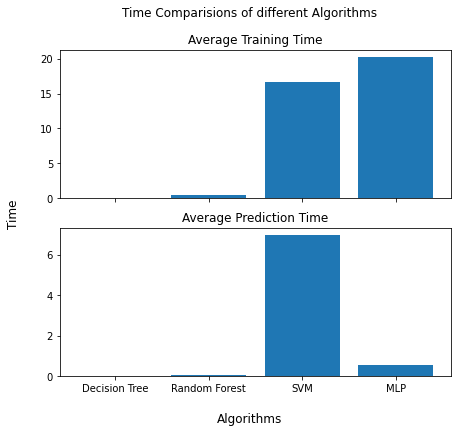

In [41]:
#Plot for the execution time
#make sure matplotlib is upgraded before running this section might throw an error if not upgraded
#data manually extracted from time.xlsx file
#Author: all team members
y_training=[0.03000,0.466667,16.593333,20.243333]
y_predi=[0.003333,0.066667,6.970000,0.553333]

fig, axs = plt.subplots(2,sharex=True,figsize=(7,6))
fig.suptitle('Time Comparisions of different Algorithms')
axs[0].bar(x=["Decision Tree","Random Forest","SVM","MLP"],
        height=y_training)
axs[1].bar(x=["Decision Tree","Random Forest","SVM","MLP"],
        height=y_predi)

axs[0].set_title("Average Training Time")
axs[1].set_title("Average Prediction Time")


fig.supylabel("Time")
fig.supxlabel("Algorithms")